<a href="https://colab.research.google.com/github/navaneethkrishnap/Insurance_cost_analytics_/blob/main/Insurance_cost_analytics_Lab_data_analytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives

 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [ ]:
df = pd.read_csv(filepath,header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [ ]:
headers = ['age','gender','BMI','no_of_children','smoker','region','charges']
df.columns = headers

In [ ]:
df.head()

,age,gender,BMI,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [ ]:
df.isnull().sum()

,0
age,0
gender,0
BMI,0
no_of_children,0
smoker,0
region,0
charges,0


In [ ]:
df.replace('?',np.nan,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [ ]:
# smoker is categorical attribute ,replace the null values to most repeated values
is_smoker = df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan,is_smoker,inplace=True)

In [ ]:
# replacing missing age values with mean
mean_age = df['age'].astype('float').mean(axis=0)
df['age'].replace(np.nan,mean_age,inplace=True)

In [ ]:
# updating data types
df[['age','smoker']] = df[['age','smoker']].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [ ]:
df['charges'].mean()

13261.369959046897

In [ ]:
# note the value and the average values of charges are longer than 2 place decimal

df[['charges']] = np.round(df[['charges']],2)
print(df.head())

   age  gender     BMI  no_of_children  smoker  region   charges
0   19       1  27.900               0       1       3  16884.92
1   18       2  33.770               1       0       4   1725.55
2   28       2  33.000               3       0       4   4449.46
3   33       2  22.705               0       0       1  21984.47
4   32       2  28.880               0       0       1   3866.86


# Exploratory Data Analysis

(0.0, 66902.85800000001)

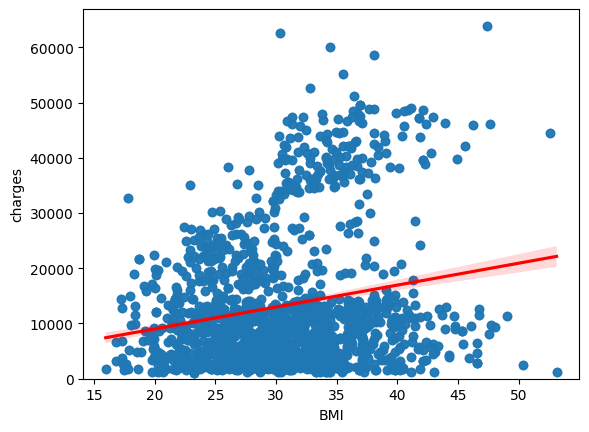

In [ ]:
# reg plot
# indep var = df['BMI']
# dep var = df['charges']

sns.regplot(x='BMI',y='charges',data=df,line_kws={'color':'red'})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

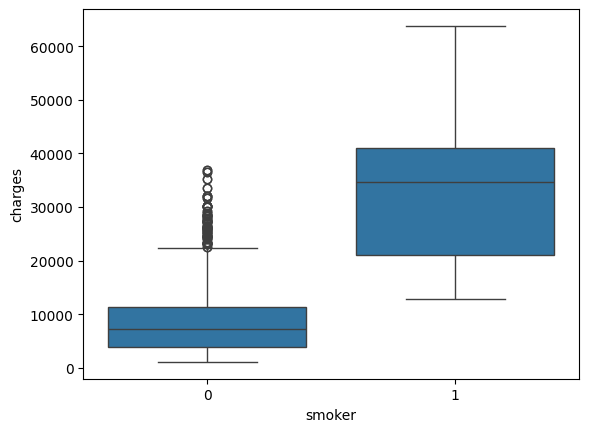

In [ ]:
sns.boxplot(x='smoker',y='charges',data=df)

In [ ]:
# correlation matrix for the dataset
df.corr()

,age,gender,BMI,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
BMI,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


# Model Development

In [ ]:
lr = LinearRegression()
X = df[['smoker']]
Y = df[['charges']]
lr.fit(X,Y)
# score
lr.score(X,Y)

0.6221791733924185

In [ ]:
Z = df[['age','gender','BMI','no_of_children','smoker','region']]
lr.fit(Z,Y)
lr.score(Z,Y)

0.7504083820289634

In [ ]:
# Create a pipeline
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452483847008637


# Model Refinement

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(Z,Y,test_size=0.2,random_state = 1)

In [ ]:
# initialse ridge regressor using parameter alpha 0.1
ridgeModel = Ridge(alpha=0.1)
ridgeModel.fit(x_train,y_train)
y_hat = ridgeModel.predict(x_test)
print(r2_score(y_test,y_hat))

0.6760807731582404


In [ ]:
# Apply polynomial transformation to the training parameters with degree=2
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
ridgeModel.fit(x_train_pr,y_train)
y_hat1 = ridgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat1))

0.7835631107608152


In [ ]:
# the r2_score is 0.78 ( which is near to 1 ) indicates that the
# polynomial ridge regression model explains 78% of the variance in the target variable
# suggesting that the model is quite good in capturing the underlying relationship between the input features and the target variable.